# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report analyzes [No Show Appointments Data](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) from Kaggle.
This dataset contains information collected from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The aim of this research is to determine factors that predict if a patient will or will not show-up for their appointment.

These investigations will provide the answer to the following questions;

 * Which neigborhood has the most patient no-shows?
 * Are male patients more likely to show up to their appointments than female patients?
 * Does receiving the reminder SMS improve the chances of patients showing up for their appointments?
 
 

In [1]:
# import all required modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>  In this section,l loaded in the data, checked for cleanliness, and then cleaned my dataset for analysis.

### General Properties

>  A number of characteristics about the patients are included in each row. for example;  
● 'ScheduledDay' tells us on what day the patient set up their appointment.  
● 'AppointmentDay' tells us on what day the patient is to show up for their appointment.  
● 'Neighborhood' indicates the location of the hospital.  
● 'Diabetes' tells us whether the patient had diabetes or not. 

In [2]:
# Load the data into a dataframe and print the first 5 lines.

df_attend = pd.read_csv('noshowappointments.csv')
df_attend.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#check the number of rows and columns
df_attend.shape


(110527, 14)

Lets display the informations about each of the columns using .info()

In [4]:
# Use the .info() method to inspect the data
df_attend.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> While inspecting the data, we notice that the No-show column has the datatype of str instead of bool. Do not be confused, 'No' in the No-show column represents patients who showed for their appointments while 'Yes' represents those who missed their appointments. 
Also, notice that the dataset is made up of mainly categorical data instead of numerical data. The date columns have a datatype of object instead of datetime.

#### Check for duplicate, unique and null values 

In [5]:
# check for duplicates
df_attend.duplicated().sum()


0

#### This check yieled no duplicate data

In [6]:
# Check for any missing data

df_attend.isnull().any()


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

#### This check yielded no missing data

In [7]:
#check for number of unique values for each of the columns
df_attend.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Here we can see the number of unique values for each of the columns in the dataset. Further research will explore why the Handicap Column has 5 categories instead of 2 'Yes' and 'No'


#### Use the .describe() method to display some descriptive statistics of our dataset.

In [8]:
# display some descriptive statistics
df_attend.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


While inspecting the data, the following issues with the data were noticed;
 * The column names,"hipertension and handcap" are misspelt
 * The columns "AppointmentDay and ScheduledDay" are in string format instead of datetime format.
 * The No-Show column name is very confusing.
 * The No-Show column values are in a string datatype
 * A lot of the columns in this dataset will not be required for my analysis.

The data wrangling processes at this stage includes;
 * Correct the names of the columns spelt wrongly. 
 * change the datatype of the columns to the correct format. 
 * Slice the dataset to extract only columns relevant to analysis. 
 * Rename the No_Show column to Attendance.
 * Change the datatype of the No_show column to dummies values for ease of analysis.

#### Change the column name Hipertension to Hypertention, Handcap to Handicap and No-Show to Attendance.

In [9]:
# Rename the columns

df_attend=df_attend.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'Attendance'})

In [10]:
df_attend.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### We can see that the column names have changed.

> Any changes made to the datatype of a column will only be applicable to this notebook and will not change the datatype in the source file. therefore, define a function that will convert the datatype for datetime columns from string to date time.


In [11]:
#define a function to convert our column datatype to datetime object
def convert_date(col):
    return pd.to_datetime(col)

    
df_attend.AppointmentDay = convert_date(df_attend.AppointmentDay) 
df_attend.ScheduledDay = convert_date(df_attend.ScheduledDay) 


In [12]:
df_attend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  Attendance    

We do not need all the columns of our dataset to answer our research questions, so we need to extract the columns relevant to our research. we do this by slicing our dataset.
The dataset is sliced to remove irrelevant columns.  Slicing using iloc is done by selecting the index number of the columns.
Resources on data slicing can be found [here](https://stackoverflow.com/questions/40698043/slicing-multiple-ranges-of-columns-in-pandas-by-list-of-names)  


In [36]:
#The dataset is sliced to remove irrelevant columns using iloc method
df_noshow = df_attend.iloc[:, [2, 5, 6, 12, 13]]

# use .head() to view the first five rows and check if the changes reflected
df_noshow.head()


,Gender,Age,Neighbourhood,SMS_received,Attendance
0,F,62,JARDIM DA PENHA,0,No
1,M,56,JARDIM DA PENHA,0,No
2,F,62,MATA DA PRAIA,0,No
3,F,8,PONTAL DE CAMBURI,0,No
4,F,56,JARDIM DA PENHA,0,No


In [14]:
#inspect the data to ensure the changes are reflected.
df_noshow.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   SMS_received   110527 non-null  int64 
 4   Attendance     110527 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.2+ MB


As we can see, only the columns(Age, Neighbourhood, SMS_received, Attendance) was extracted.

We need to convert the Attendance column to dummy variables to enable us perfrom numerical analysis on it.

In [15]:
#convert the Attendance column to dummy variables
df_noshow.Attendance.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9908\1734988564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noshow.Attendance.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)


Now let us view our cleaned data before we start our exploratory analysis.

In [16]:
df_noshow.head()

,Gender,Age,Neighbourhood,SMS_received,Attendance
0,F,62,JARDIM DA PENHA,0,0
1,M,56,JARDIM DA PENHA,0,0
2,F,62,MATA DA PRAIA,0,0
3,F,8,PONTAL DE CAMBURI,0,0
4,F,56,JARDIM DA PENHA,0,0


As you can see in the final cleaned data, the attendance column has been converted to 1's and 0's. Now we can begin our exploratory analysis.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have trimmed and cleaned our data, we are ready to move on to exploration. Let us compute statistics and create visualizations with the goal of addressing the research questions. 
> Its is important to note that our dataset contains mainly categorical data, therefore we cannot show strong correlation between variables. Therefore, our aim is to use, Descriptive statictics to show relationship between the variables.

In [17]:
# lets compute some descriptive statistics for our cleaned dataset
df_noshow.describe()

,Age,SMS_received,Attendance
count,110527.000000,110527.000000,110527.000000
mean,37.088874,0.321026,0.201933
std,23.110205,0.466873,0.401444
min,-1.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000
75%,55.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000


From these Statistcs, we can see that the min age is -1, this may imply patients less than 1 year old. The average patient age is 37 years and the oldest patient is 115 years old.


### Let us plot a histogram to visualize our dataset.

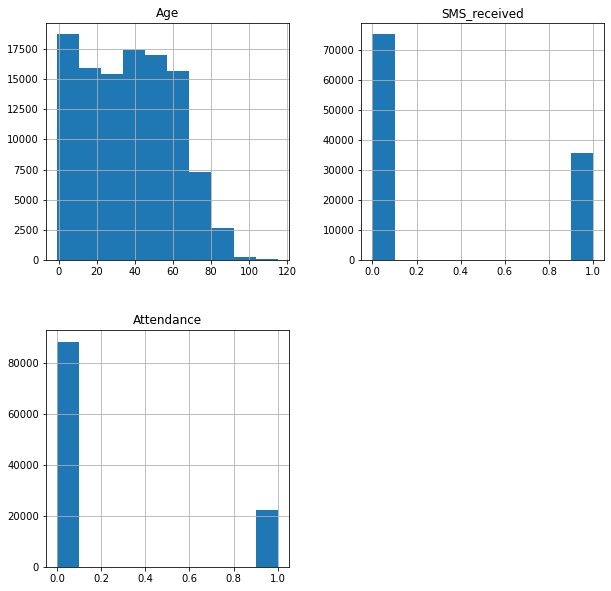

In [18]:
# plot a histogram of the dataset

df_noshow.hist(figsize= (10,10));


Now lets explore the percentage of patient noshows using a piechart. Since we will be plotting other piecharts later, let us define a function that will plot a piechart for our dataframe. 

In [19]:
# define a function to plot a pie chart
def pieplot(x, Title):
     return x.plot(kind = 'pie' , autopct= '%1.1f%%' , startangle = 200, fontsize = 17, figsize = (6,6), title = Title)


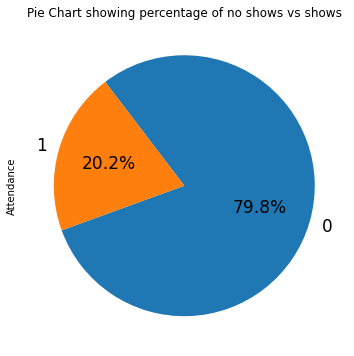

In [20]:
Plot = df_noshow['Attendance'].value_counts()
pieplot(Plot, 'Pie Chart showing percentage of no shows vs shows');

According to this piechart, 20.2 percent of patients in our dataset did not show up for their appointment. We know this because 1 represents the population of patients who did not attend their appointments as we assigned it a dummy variable of 1. Now lets further explore which variables can help us find out why.

### QUESTION 1: What is the relationship between patient's ages and their attendance?

In this question, we are trying to find out if patient's ages affect their attendance. We want to know if more elderly or younger patients showed up for their appointments. We want to use a heatmap to visualize the correlation between the Age column and the Attendance column. first let us visualize the age distribution usig a boxplot.

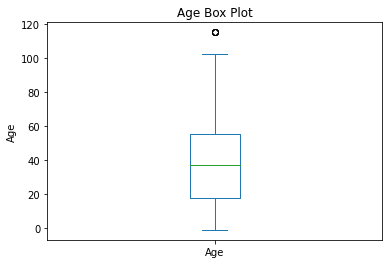

In [21]:
# plot the boxplot
df_noshow.plot(y="Age", kind="box").set(title='Age Box Plot', ylabel='Age');

Lets plot the correlation matix to visualize the correlation between our columns

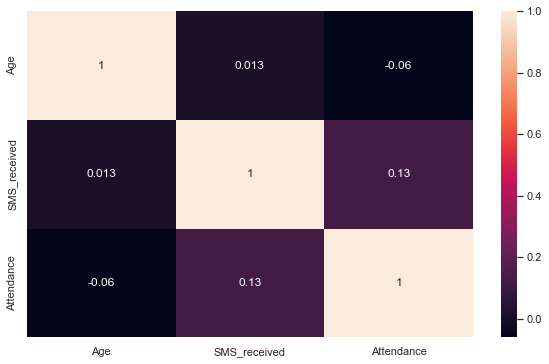

In [22]:
# plot a heatmap
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(df_noshow.corr(), annot=True)
plt.show()

From the heatmap above, the corelation between the Age and Attendance is -0.06. Therefore, there is no positive corelation between the age of the patients and number of Noshows.

### QUESTION 2: Which neighborhood has the most patient attendance?

Now lets create a mask of the Attendance column to enable us extract, modify, count, or otherwise manipulate values in the column based on wether the patients showed or didn't show. To do this, let us define 2 variables showed and noshowed to represent those that showed and those that missed their appointments, respectively.

In [23]:
#create a mask of the Attendance column
showed = df_noshow.query('Attendance == 0 ')
noshowed = df_noshow.query('Attendance == 1 ')

Let us create a variable that will show the number of patients who attended their appointment in each neighbourhood and plot a barchart to visualize it.

In [24]:
Neighb = showed.Neighbourhood.value_counts()[:10]
Neighb

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
CENTRO             2631
ITARARÉ            2591
TABUAZEIRO         2559
SANTO ANTÔNIO      2262
BONFIM             2223
Name: Neighbourhood, dtype: int64

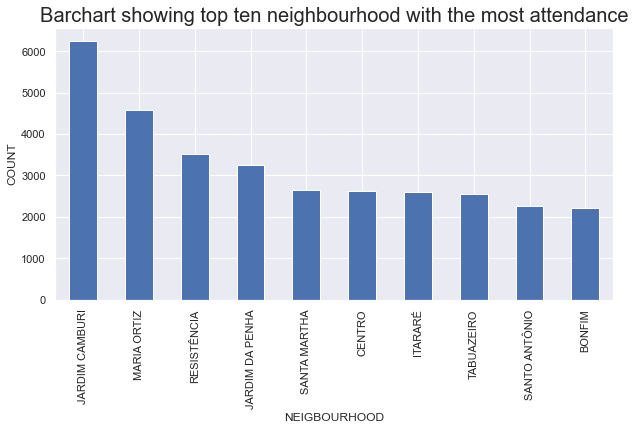

In [25]:
#function to plot a barchat
def barplot(x):

    return x.plot(kind = 'bar', figsize= (10,5))


ax= barplot(Neighb)
ax.set_xlabel('NEIGBOURHOOD')
ax.set_ylabel('COUNT')
ax.set_title('Barchart showing top ten neighbourhood with the most attendance', fontsize= 20);

The barplot shows the top 10 neighbourhood with the highest attendance and we can see that JARDIM CAMBURI has the highest number of patient attendance.

### QUESTION 3: Which Gender is more likely to show up for their appointment?

Let us create a variable that will show the number of male or female patients who attended their appointment and plot a barchart to visualize it.

In [26]:
sex = showed.Gender.value_counts()
sex.head()

F    57246
M    30962
Name: Gender, dtype: int64

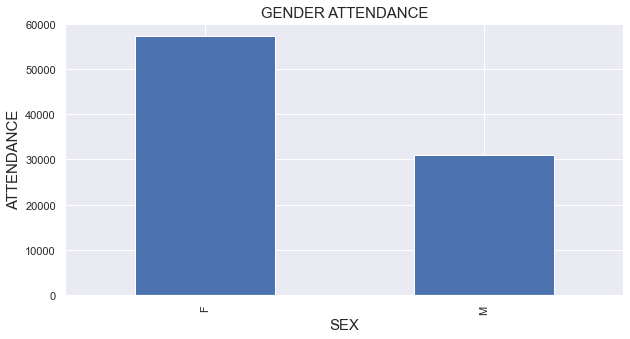

In [27]:
sex = barplot(sex)
sex.set_xlabel('SEX', fontsize = 15)
sex.set_ylabel('ATTENDANCE', fontsize = 15)
sex.set_title('GENDER ATTENDANCE', fontsize = 15);

According to the analysis and the barchart, female patients are more likely to show up for their appointments than their male counterparts.



### QUESTION 4: Does receiving the reminder SMS improve the chances of patients showing up for their appointments?

In [28]:
# Identify the unique values of the SMS_received column
df_noshow['SMS_received'].unique()


# 0 represents those who did not received the SMS while 1 represents those who received the SMS

array([0, 1], dtype=int64)

In [29]:
smsreceived = df_noshow.query('SMS_received == 1')
nosms = df_noshow.query('SMS_received == 0')

In [30]:
# To check the number of people who receieved the sms
smsreceived.shape

(35482, 5)

In [31]:
# To check the number of people who didnt receive the sms
nosms.shape

(75045, 5)

In [32]:
# To check the number of people who received the sms and showed up
smsreceived.Attendance.value_counts()

0    25698
1     9784
Name: Attendance, dtype: int64

According to the above analysis, out of 35,482 patients who received the SMS, 25,698 of them showed up for their appointment while 9784 patients didnt show up despite receiving the SMS.


Below is a barchart visualization of the analysis.

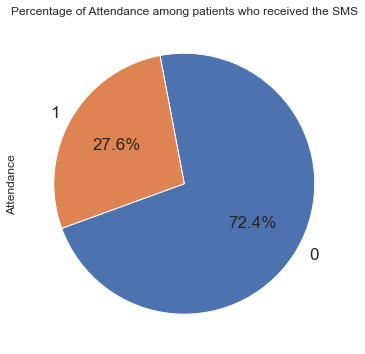

In [37]:
#plot a piechart to visualize the Percentage of Attendance among patients who received the SMS
sms_received = smsreceived.Attendance.value_counts()

pieplot(sms_received, 'Percentage of Attendance among patients who received the SMS');

We can see from the piechart that only 27. percent of patients who received the sms, attended their appointments.

In [34]:
# Check for the number of patients who didnt received the SMS but showed up and those that didnt show up
no_sms = nosms.Attendance.value_counts()
no_sms

0    62510
1    12535
Name: Attendance, dtype: int64

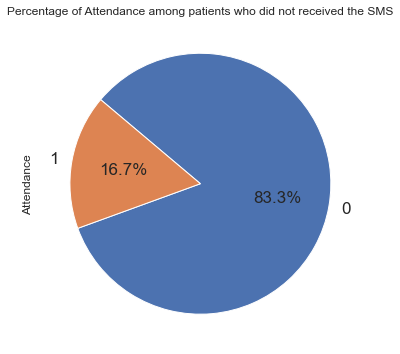

In [38]:

pieplot(no_sms, 'Percentage of Attendance among patients who did not received the SMS');

According to the above analysis, there were a total of 75045 patients who did not receicve the SMS. 62510 of them showed up for their appoinment, despite not receiving the SMS. A total of 12,535 patients who didnt received the SMS, did not show up for appointments. It is unusual that more patients who didnt receive the SMS showed up for their appointments than patients who actually received the SMS. Further investigations is required to determine why.

<p> As shown in the charts, 72.4% of people that received the SMS went for their appointment while 83.3% of people that didn't receive SMS went for their appointment. In conclusion sending SMS doesn't guarantee that patients will show up for their appointments.

<a id='conclusions'></a>
## Conclusions
>### Results
 * There are no positive corelation between the age of the patients and number of Noshows.
 * Patients from JARDIM CAMBURI have the highest attenance from all the neighbourhoods.
 * Women are more likely to attend their appointments than men. 
 * It is unusual that more patients who didnt receive the SMS showed up for their appointments than patients who actually received the SMS. Further investigations is required to determine why. 
 * In conclusion, to determine which variables can influence a patients attendance, inferential statistical methods will have to be employed.

>### Limitations


 * Our dataset is made up mainly of categorical data which cannot allow high level of analysis to be performed on our dataset.
 * Descriptive statistics was used throughout our research because the nature of the data prevents further investigation.
 * This dataset lacks further information which could help draw a better understanding of our variables. for example, JARDIM CAMBURI has the highest number of attendance, this could mean that its in a bigger city and more data was collected there than in other neighbourhoods.